In [1711]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Read and Clean

Let's follow the 5 step data science process - gather, assess, clean, analyze, visualize, and model.
In this particular section, we'll deal with the first three steps. We'll first load our data, check certain attributes such as number of rows, columns, types of variables, and so on. After this, we'll look for missing values and clean up any values which are not represented correctly. 

### Reading data

In [1774]:
df = pd.read_csv('../LS_2.0.csv')

df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [1713]:
print(df.shape)
print("\n", df.columns)

(2263, 19)

 Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')


In [1714]:
# let's rename columns to lowercase for convenience and also add more context to some colum names
df.columns = ['state', 'constituency', 'candidate', 'is winner', 'party', 'symbol', 'gender',
             'criminal cases', 'age', 'minority category', 'education', 'assets', 'liabilities', 
             'general votes', 'postal votes', 'total votes', 'vote percentage by total electors', 
             'vote percentage by total votes polled', 'total electors']

In [1715]:
# It seems criminal cases, assets, and liabilities are strings instead of integers.
# Otherwise the dtypes of variables look fine
df.dtypes

state                                     object
constituency                              object
candidate                                 object
is winner                                  int64
party                                     object
symbol                                    object
gender                                    object
criminal cases                            object
age                                      float64
minority category                         object
education                                 object
assets                                    object
liabilities                               object
general votes                              int64
postal votes                               int64
total votes                                int64
vote percentage by total electors        float64
vote percentage by total votes polled    float64
total electors                             int64
dtype: object

In [1716]:
# Seems like there's a pattern for the missing values. Let's see if we can find one
df.isnull().sum()

state                                      0
constituency                               0
candidate                                  0
is winner                                  0
party                                      0
symbol                                   245
gender                                   245
criminal cases                           245
age                                      245
minority category                        245
education                                245
assets                                   245
liabilities                              245
general votes                              0
postal votes                               0
total votes                                0
vote percentage by total electors          0
vote percentage by total votes polled      0
total electors                             0
dtype: int64

In [1717]:
# The missing values belong to 'NOTA' i.e. 'none of the above'
# In India, a voter can poll for the NOTA category if they don't like any candidates running from their constituency

df[df.isnull().any(axis = 1)]

,state,constituency,candidate,is winner,party,symbol,gender,criminal cases,age,minority category,education,assets,liabilities,general votes,postal votes,total votes,vote percentage by total electors,vote percentage by total votes polled,total electors
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
14,Gujarat,AHMEDABAD WEST,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14580,139,14719,0.895688,1.473030,1643317
39,West Bengal,ALIPURDUARS,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21147,28,21175,1.284592,1.533114,1648383
46,Uttarakhand,ALMORA,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15311,194,15505,1.158985,2.215611,1337808
54,Andhra Pradesh,AMALAPURAM,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16427,41,16468,1.128288,1.333044,1459556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,Tamil Nadu,VIRUDHUNAGAR,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17087,205,17292,1.165028,1.607174,1484256
2230,Andhra Pradesh,VISAKHAPATNAM,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16626,20,16646,0.909966,1.342505,1829300
2235,Andhra Pradesh,VIZIANAGARAM,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29468,33,29501,1.961529,2.413302,1503980
2241,Telangana,WARANGAL,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18764,37,18801,1.127990,1.770886,1666770


### Cleaning data

In [1718]:
# The NOTA category does seem very interesting. 
# However, it doesn't seem relevant for the questions we have.
# We can safely drop these missing values

df.dropna(axis = 0, how = 'any', inplace = True)
df.shape

(2018, 19)

In [1719]:
# Few columns have the value 'Not Available'
# Wow that's sneaky! I thought we have taken care of all NA values
# Also, education 

object_columns = list(df.select_dtypes(include = 'object').columns)

for col in object_columns:
    print("\n" + col.title())
    print(df[col].unique()) 


State
['Telangana' 'Uttar Pradesh' 'Maharashtra' 'Gujarat' 'Rajasthan' 'Kerala'
 'West Bengal' 'Uttarakhand' 'Andhra Pradesh' 'Haryana' 'Punjab'
 'Jammu & Kashmir' 'Andaman & Nicobar Islands' 'Tamil Nadu' 'Bihar'
 'Arunachal Pradesh' 'Odisha' 'Assam' 'Karnataka' 'Madhya Pradesh'
 'Chhattisgarh' 'Chandigarh' 'NCT OF Delhi' 'Jharkhand'
 'Dadra & Nagar Haveli' 'Daman & Diu' 'Himachal Pradesh' 'Manipur'
 'Lakshadweep' 'Mizoram' 'Nagaland' 'Goa' 'Puducherry' 'Meghalaya'
 'Sikkim' 'Tripura']

Constituency
['ADILABAD' 'AGRA' 'AHMADNAGAR' 'AHMEDABAD EAST' 'AHMEDABAD WEST' 'AJMER'
 'AKBARPUR' 'AKOLA' 'ALAPPUZHA' 'ALATHUR' 'ALIGARH' 'ALIPURDUARS'
 'ALLAHABAD' 'ALMORA' 'ALWAR' 'AMALAPURAM' 'AMBALA' 'AMBEDKAR NAGAR'
 'AMETHI' 'AMRAVATI' 'AMRELI' 'AMRITSAR' 'AMROHA' 'ANAKAPALLI' 'ANAND'
 'ANANDPUR SAHIB' 'ANANTAPUR' 'ANANTNAG' 'ANDAMAN & NICOBAR ISLANDS'
 'AONLA' 'ARAKKONAM' 'ARAMBAGH' 'ARANI' 'ARARIA' 'ARRAH' 'ARUKU'
 'ARUNACHAL EAST' 'ARUNACHAL WEST' 'ASANSOL' 'ASKA' 'ATTINGAL'
 'AURANGABAD' 'AU

In [1720]:
# It seems there are some errors in education column. There's a value with new line character,
# some categories are verbose (5th, 8th, 10th and 12th are all elementary levels),
# and some categories are ambiguous, for example, the value literate.
# We'll fix these values. Literate can be part of Others as we don't exactly know the education level.
# All elementary levels and illiterate will be now 'Elemantary or lower'
# Lastly, Graduate and Graduate Professional have the same meaning so we can bin them together

df['education'] = df['education'].replace({'5th Pass': "Elementary or lower", '8th Pass': "Elementary or lower",
                                          '10th Pass': "Elementary or lower" , '12th Pass': "Elementary or lower", 
                                          'Illiterate': "Elementary or lower", 'Literate': 'Others',
                                           'Graduate Professional': 'Graduate', 'Post Graduate\n': 'Post Graduate'})
df['education'].unique()                

array(['Elementary or lower', 'Post Graduate', 'Doctorate', 'Graduate',
       'Others', 'Not Available'], dtype=object)

In [1721]:
# After some investigation, I found various inccorect labels like 'Not Available'
# Let's convert them to null values for now.

df.replace('Not Available', np.NaN, inplace = True)
df.replace('Nil', np.NaN, inplace = True)
df.replace('NIL', np.NaN, inplace = True)
df.replace('`', np.NaN, inplace = True)

# Again we see a pattern - all columns have exactly 22 NAs
df.isnull().sum()

state                                     0
constituency                              0
candidate                                 0
is winner                                 0
party                                     0
symbol                                    0
gender                                    0
criminal cases                           22
age                                       0
minority category                         0
education                                22
assets                                   26
liabilities                              23
general votes                             0
postal votes                              0
total votes                               0
vote percentage by total electors         0
vote percentage by total votes polled     0
total electors                            0
dtype: int64

In [1722]:
# Almost all missing value are from the same rows
# It makes sense to drop these columns rather than replace them
# We only lose a maximum of 26 rows which should okay given that we are left with 1991 rows

# However, it would be interesting to compare our prediction models by imputing these values
# My guess is it wouldn't show significant difference

df[df.isnull().any(axis = 1)]

,state,constituency,candidate,is winner,party,symbol,gender,criminal cases,age,minority category,education,assets,liabilities,general votes,postal votes,total votes,vote percentage by total electors,vote percentage by total votes polled,total electors
186,Assam,AUTONOMOUS DISTRICT,JONES INGTI KATHAR,0,IND,Battery Torch,MALE,0,68.0,ST,Post Graduate,"Rs 6,10,218\n ~6 Lacs+",NaN,39425,158,39583,4.973082,6.406488,795945
413,Telangana,BHONGIR,Singapaka Lingam,0,IND,Road Roller,MALE,0,44.0,SC,Elementary or lower,NaN,Rs 0\n ~,27973,0,27973,1.718208,2.306525,1628033
468,Bihar,BUXAR,Ramchandra Singh Yadav,0,IND,Almirah,MALE,NaN,42.0,GENERAL,NaN,NaN,NaN,10721,9,10730,0.586540,1.087175,1829373
532,Tamil Nadu,CHIDAMBARAM,SIVAJOTHI M,0,NTK,Ganna Kisan,MALE,NaN,35.0,SC,NaN,NaN,NaN,37329,142,37471,2.531445,3.246331,1480222
585,Gujarat,DAHOD,DEVDHA SAMSUBHAI KHATARABHAI,0,IND,Boat with Man and Sail,MALE,0,51.0,ST,Graduate,NaN,Rs 0\n ~,11135,7,11142,0.696837,1.046796,1598939
612,Uttar Pradesh,DEORIA,BINOD KUMAR JAISWAL,0,BSP,Elephant,MALE,NaN,56.0,GENERAL,NaN,NaN,NaN,327728,2985,330713,18.852693,32.563441,1754195
613,Uttar Pradesh,DEORIA,NIYAZ AHMED,0,INC,Hand,MALE,NaN,57.0,GENERAL,NaN,NaN,NaN,50749,307,51056,2.910509,5.027196,1754195
654,Tamil Nadu,DINDIGUL,"JOTHIMUTHU, K.",0,PMK,Mango,MALE,NaN,48.0,GENERAL,NaN,NaN,NaN,206782,769,207551,13.460896,17.877979,1541881
656,Tamil Nadu,DINDIGUL,"MANSOORALI KHAN, A.",0,NTK,Ganna Kisan,MALE,NaN,56.0,GENERAL,NaN,NaN,NaN,54574,383,54957,3.564283,4.733873,1541881
688,Andhra Pradesh,ELURU,PENTAPATI PULLARAO,0,JnP,Glass Tumbler,MALE,NaN,71.0,GENERAL,NaN,NaN,NaN,76481,346,76827,4.816891,5.766884,1594950


In [1723]:
df.dropna(inplace = True)

In [1724]:
print(df.shape)
df.isnull().sum()

(1991, 19)


state                                    0
constituency                             0
candidate                                0
is winner                                0
party                                    0
symbol                                   0
gender                                   0
criminal cases                           0
age                                      0
minority category                        0
education                                0
assets                                   0
liabilities                              0
general votes                            0
postal votes                             0
total votes                              0
vote percentage by total electors        0
vote percentage by total votes polled    0
total electors                           0
dtype: int64

In [1725]:
# Now let's see if we can fix assets and liablities
# There's pattern here, we see actual values sandwiched between "Rs" and "\n ~ 12..""
# The Rs is the short for the Indian currency rupee
# The /n is the new line character after which the actual value is rounded to the nearest '000s

df[['candidate','assets', 'liabilities']].head(6)

,candidate,assets,liabilities
0,SOYAM BAPU RAO,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+"
1,Godam Nagesh,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+"
2,RATHOD RAMESH,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+"
4,Satyapal Singh Baghel,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+"
5,Manoj Kumar Soni,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+"
6,Preeta Harit,"Rs 5,50,75,753\n ~ 5 Crore+",Rs 0\n ~


In [1726]:
df['liabilities'] = df['liabilities'].str.split('[ \n]').str[1] # splitting string by space or /n
df['liabilities'] = df['liabilities'].str.replace(',', '') # removing commas
df['liabilities'] = df['liabilities'].astype(str).astype(float) # converting to float

In [1727]:
df['assets'] = df['assets'].str.split('[ \n]').str[1] # splitting string by space or /n
df['assets'] = df['assets'].str.replace(',', '') # removing commas
df['assets'] = df['assets'].astype(str).astype('float64') # converting to float

In [1728]:
df['criminal cases'] = df['criminal cases'].astype(str).astype(int) # converting to integer

## Exploratory Analysis
In this section we'll analyze and visualize the data. It's a good time to pose some questions that we can answer through our analysis. After glancing through the data, I was curious about the following things:

1. What is the total number of eligible voters (total electorals) by each state and how many voters actually polled in different states?
2. How's the diversity among the political parties that won most seats? Are they better or worse compared to the total population (i.e. all candidates in our dataset)?
3. What can we say about the candidates of parties that won most seats? What's their education qualification and how many criminal cases do they have against them? How does it compare to the population?
4. Can we accurately predict the candidates who win the election? What factors are the most important for a candidate to win?

### Eligible voters and total votes polled in by state

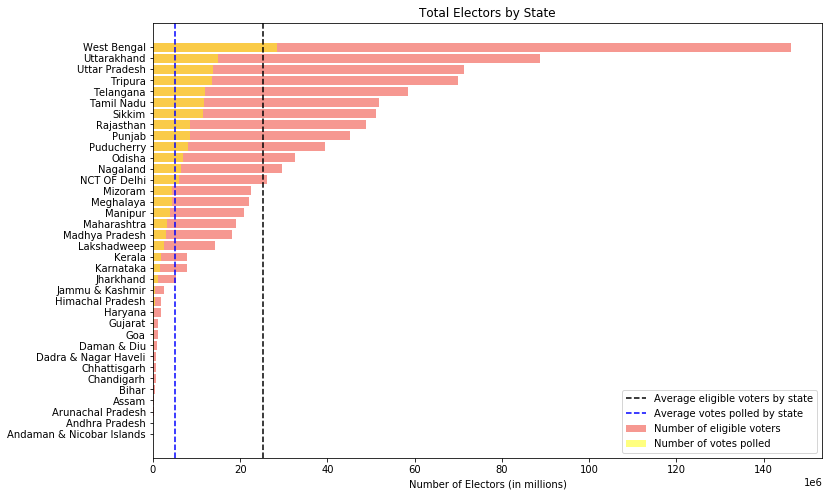

In [1729]:
# This might seem a bit tricky. Since there are multiple candidates from 
# a single constituency, we have duplicate values for 'total electors'.
# Hence, we take a mean of this value to workaround the duplicates.
electors_by_const = df.groupby(['state', 'constituency'])['total electors'].mean() # one value for each constituency

# We then use groupby() to get the 'total electors' in each state
electors_by_state = pd.DataFrame(electors_by_const.groupby('state').sum()) # value by state

# Same two steps but for total votes
votes_by_const = df.groupby(['state', 'constituency'])['total votes'].mean()
votes_by_state = pd.DataFrame(votes_by_const.groupby('state').sum())

fig, ax = plt.subplots(figsize=(12,8))

ax.barh(electors_by_state.index, 
         electors_by_state['total electors'].sort_values(),
         height = 0.8,
         alpha=0.5,
         color='#EE3224');

ax.barh(votes_by_state.index, 
         votes_by_state['total votes'].sort_values(),
         height = 0.8,
         alpha=0.5,
         color='yellow'); 



# Line representing the average electors for all states
plt.axvline(electors_by_state['total electors'].mean(),
           linestyle = '--', color = 'black');

plt.axvline(votes_by_state['total votes'].mean(),
           linestyle = '--', color = 'blue');

ax.legend(['Average eligible voters by state', 'Average votes polled by state', 
           'Number of eligible voters', 'Number of votes polled'])
ax.set_title('Total Electors by State')
ax.set_xlabel('Number of Electors (in millions)');


# removing scientific notation (although unsuccessfully as '1e6' still shows up)
ax.ticklabel_format(useMathText = False, style='sci', scilimits = (6,6) , axis = 'x')

### Diversity in top five parties (by most wins)
Let's see the diversity of political parties that won most seats.
We'll look at three variables - gender, age, and representation of minorities

In [1730]:
# Parties that won the most seats
# Here we group by 'party' and then aggregate and sort by 'is winner' which has the value 0 or 1
top_five = df.groupby(['party']).agg({'is winner': 'sum'}).sort_values('is winner', ascending = False)[:5]
top_five

,is winner
party,
BJP,300
INC,52
DMK,23
AITC,22
YSRCP,22


In [1731]:
# We filter our dataframe to include only the top five parties. 
# Also note, we'll consider all candidates - those who won and those who didn't
top_five = df[df['party'].isin(top_five.index)]

# Number of males and female by party
top_five_gender = pd.crosstab(top_five['party'], top_five['gender']) 

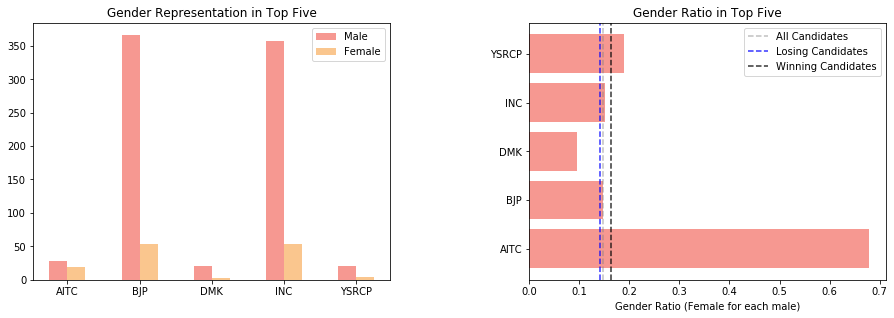

In [1732]:
# Visualizing the gender plit and gender ratio
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,7))

pos = list(range(len(top_five_gender.index))) 
width = 0.25

# We'll place the number of males and female side by sde
# If you like the graphs below, you can find more from original author https://chrisalbon.com/
ax[0].bar(pos, 
        top_five_gender['MALE'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=list(top_five_gender.index)[0]) 

ax[0].bar([p + width for p in pos], 
        top_five_gender['FEMALE'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=list(top_five_gender.index)[1]) 


ax[0].set_xticks([p + 0.5 * width for p in pos])
ax[0].set_xticklabels(top_five_gender.index);

ax[0].set_title('Gender Representation in Top Five')
ax[0].legend(['Male', 'Female'])



# let's compare the gender ratio of top five with the total population
ax[1].barh(top_five_gender.index, 
        # For the ratio we just divide no. of females by number of males.
        # The ratio represents no. of females for each male representation.
        top_five_gender['FEMALE']/top_five_gender['MALE'],
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224') 

# Gender ratio for all candidates
ax[1].axvline(df['gender'].value_counts()[1]/df['gender'].value_counts()[0],
              alpha = 0.5, color = 'grey', linestyle = '--');

# Gender ratio among losing candidates
ax[1].axvline(df[df['is winner'] == 0]['gender'].value_counts()[1]/df[df['is winner'] == 0]['gender'].value_counts()[0],
           alpha = 0.8, color = 'blue', linestyle = '--');

# Gender ratio among winners
ax[1].axvline(df[df['is winner'] == 1]['gender'].value_counts()[1]/df[df['is winner'] == 1]['gender'].value_counts()[0],
           alpha = 0.8, color = 'black', linestyle = '--');

ax[1].set_title('Gender Ratio in Top Five')
ax[1].set_xlabel('Gender Ratio (Female for each male)')
ax[1].legend(['All Candidates', 'Losing Candidates', 'Winning Candidates'])

fig.tight_layout(pad = 10)

In [1733]:
# Minority counts by the top five
top_five_minority = pd.crosstab(top_five['party'], top_five['minority category'])
# Creating a dataframe to add minority counts for all candidates/parties
overall_category = pd.DataFrame({'Overall': df['minority category'].value_counts()})
overall_category = overall_category.T
top_five_minority = top_five_minority.append(overall_category)
# Printing the dataframe
display(top_five_minority)

# Minority counts by the top five
top_five_age = top_five.groupby('party', as_index = False)['age'].mean()
# Creating a dictionary to add mean age by all candidates/parties
overall = {'party': 'Overall', 'age': df['age'].mean()}
# Appending the above to top_five_age
top_five_age = top_five_age.append(overall, ignore_index = True)
# Rounding means for cleaner output
top_five_age = top_five_age.round(1)

top_five_age

minority category,GENERAL,SC,ST
AITC,32,10,5
BJP,304,62,54
DMK,19,4,0
INC,289,73,49
YSRCP,20,4,1
Overall,1372,379,240


,party,age
0,AITC,54.0
1,BJP,54.6
2,DMK,55.8
3,INC,55.0
4,YSRCP,50.3
5,Overall,52.4


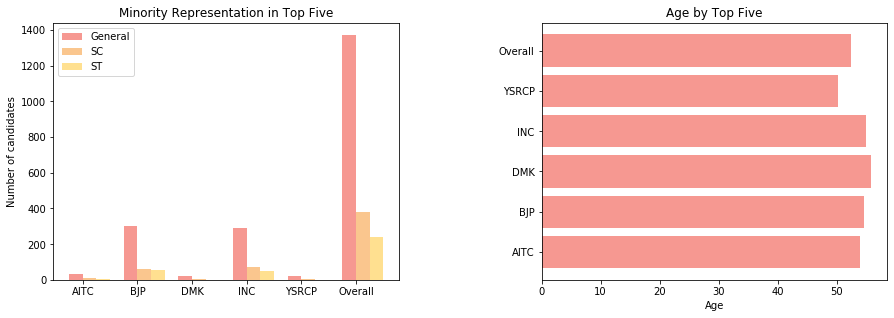

In [1734]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,7))

# Setting positions and width for bar plots
pos = list(range(len(top_five_minority.index))) 
width = 0.25

# Side by side barplots
ax[0].bar(pos, top_five_minority['GENERAL'], width, alpha=0.5, color='#EE3224',label=list(top_five_minority.index)[0]) 

ax[0].bar([p + width for p in pos], top_five_minority['SC'], width, alpha=0.5, color='#F78F1E',
        label=list(top_five_minority.index)[1]) 

ax[0].bar([p + width*2 for p in pos], top_five_minority['ST'], width, alpha=0.5, color='#FFC222', 
        # with label the second value in first_name
        label=list(top_five_minority.index)[1])

# Title for the plot
ax[0].set_title('Minority Representation in Top Five')
# Setting x-axis tick labels
ax[0].set_xticklabels(top_five_minority.index);
# Setting y-axis label
ax[0].set_ylabel('Number of candidates')
# Offsetting x-axis labels to shift them at center
ax[0].set_xticks([p + 0.5 * width for p in pos])
# Plot legend
ax[0].legend(['General', 'SC', 'ST']);


# let's compare the age of candidates represented by top five with the total population
ax[1].barh(top_five_age['party'], 
        # For the ratio we just divide no. of females by number of males.
        # The ratio represents no. of females for each male representation.
        top_five_age['age'],
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224') 

ax[1].set_title('Age by Top Five')
ax[1].set_xlabel('Age')

fig.tight_layout(pad = 10)

In [1735]:
# Education-level counts by the top five
top_five_education = pd.crosstab(top_five['party'], top_five['education'])
# Creating a dataframe to add education counts for all candidates/parties
overall_category = pd.DataFrame({'Overall': df['education'].value_counts()})
overall_category = overall_category.T
top_five_education = top_five_education.append(overall_category)
# Printing the dataframe
display(top_five_education)

# Criminal cases by the top five
top_five_cases = top_five.groupby('party', as_index = False)['criminal cases'].mean()
# Creating a dictionary to add mean no. of cases by all candidates/parties
overall = {'party': 'Overall', 'criminal cases': df['criminal cases'].mean()}
# Appending the above to top_five_cases
top_five_cases = top_five_cases.append(overall, ignore_index = True)
# Rounding means for cleaner output
top_five_cases = top_five_cases.round(1)

top_five_cases

,Doctorate,Elementary or lower,Graduate,Others,Post Graduate
AITC,0,9,23,1,14
BJP,19,106,168,16,111
DMK,2,3,12,0,6
INC,11,89,188,9,114
YSRCP,1,3,11,0,10
Overall,73,562,775,80,501


,party,criminal cases
0,AITC,0.9
1,BJP,2.1
2,DMK,1.2
3,INC,1.8
4,YSRCP,1.6
5,Overall,1.5


### Criminal cases and Education Qualification

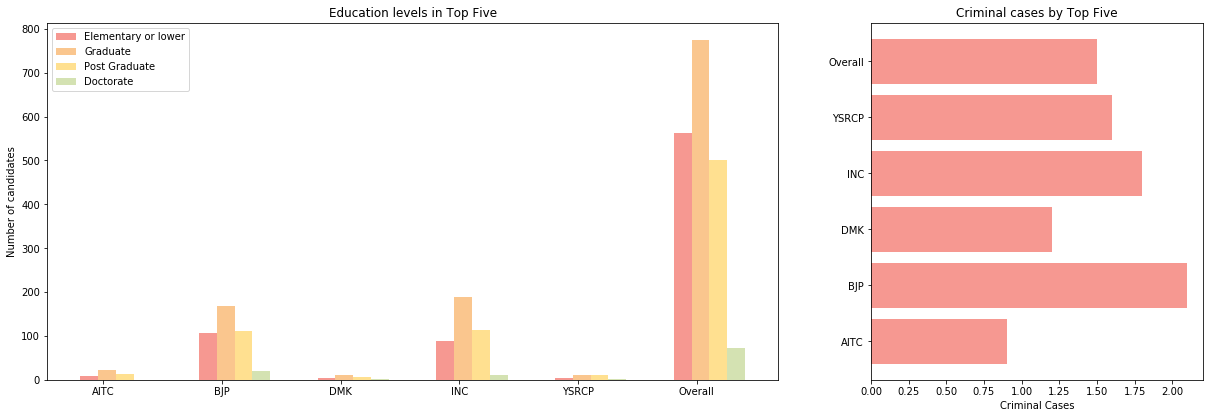

In [1736]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7), gridspec_kw={'width_ratios': [2.2, 1]})

# Setting positions and width for bar plots
pos = list(range(len(top_five_education.index))) 
width = 0.15

# Side by side barplots
ax[0].bar(pos, top_five_education['Elementary or lower'], width, alpha=0.5, color='#EE3224',
          label=list(top_five_minority.index)[0]) 

ax[0].bar([p + width for p in pos], top_five_education['Graduate'], width, alpha=0.5, color='#F78F1E',
        label=list(top_five_education.index)[1]) 

ax[0].bar([p + width*2 for p in pos], top_five_education['Post Graduate'], width, alpha=0.5, color='#FFC222', 
        # with label the second value in first_name
        label=list(top_five_education.index)[2])
ax[0].bar([p + width*3 for p in pos], top_five_education['Doctorate'], width, alpha=0.5, color='#ABC666', 
        # with label the second value in first_name
        label=list(top_five_education.index)[3])

# Title for the plot
ax[0].set_title('Education levels in Top Five')
# Setting x-axis tick labels
ax[0].set_xticklabels(top_five_minority.index);
# Setting y-axis label
ax[0].set_ylabel('Number of candidates')
# Offsetting x-axis labels to shift them at center
ax[0].set_xticks([p + 0.8 * width for p in pos])
# Plot legend
ax[0].legend(['Elementary or lower', 'Graduate', 'Post Graduate', 'Doctorate']);


# let's compare the age of candidates represented by top five with the total population
ax[1].barh(top_five_cases['party'], 
        # For the ratio we just divide no. of females by number of males.
        # The ratio represents no. of females for each male representation.
        top_five_cases['criminal cases'],
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224') 

ax[1].set_title('Criminal cases by Top Five')
ax[1].set_xlabel('Criminal Cases')

fig.tight_layout(pad = 5)

In [1772]:
# Perhaps for education levels it's better to look at percentages
top_five_education = top_five_education.div(top_five_education.sum(axis=1), axis=0).round(2)
top_five_education = top_five_education*100

top_five_education

,Doctorate,Elementary or lower,Graduate,Others,Post Graduate
AITC,0.0,19.0,49.0,2.0,30.0
BJP,5.0,25.0,40.0,4.0,26.0
DMK,9.0,13.0,52.0,0.0,26.0
INC,3.0,22.0,46.0,2.0,28.0
YSRCP,4.0,12.0,44.0,0.0,40.0
Overall,4.0,28.0,39.0,4.0,25.0


## Predicting the winners
In the final section, we'll model our data and try to predict winners. We'll use three algorithms - logistic regression, K nearest neighbor, and decision tree. We'll also use some visualization techniques to assess which model gives us the best result and how to interpret some models

In [1430]:
# Let's have a look at the data again
df.head()

,state,constituency,candidate,is winner,party,symbol,gender,criminal cases,age,minority category,education,assets,liabilities,general votes,postal votes,total votes,vote percentage by total electors,vote percentage by total votes polled,total electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414.0,231450.0,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888.0,847000.0,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000.0,15300000.0,314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036.0,8606522.0,644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,133784385.0,22251891.0,434199,1130,435329,22.466390,37.999125,1937690


In [1431]:
# We can see certan columns such as candidate or symbol are not really meaningful for predictions
# Also, columns such as total votes do not make sense because if we were to predict next years election
# we wouldn't have this data point i.e. we wouldn't know how many votes a conddidate received before the election even starts

cols_of_interest = ['party', 'gender', 'criminal cases', 'age', 'minority category',
                   'education', 'assets', 'liabilities', 'total electors', 'is winner']
df = df[cols_of_interest]

In [1432]:
# Creating dummy variables

# The below function take in the dataframe, column names, and dummyna as arguments.
# dummyna is a boolean. If true, the function creates a column for NA values for respective categorical.
def create_dummy(df, cols, dummyna):
    for col in cols:
            df = pd.concat([df.drop(col, axis = 1), pd.get_dummies(df[col], dummy_na = dummyna, 
                                                                prefix = col, drop_first = True)], axis = 1)
    return df

# list of categorical columns
categorical = df.select_dtypes(include = 'object').copy().columns 

clean_df = create_dummy(df, categorical, False)
clean_df.head()

,criminal cases,age,assets,liabilities,total electors,is winner,party_AAP,party_ABGP,party_ABSKP,party_ADAL,...,education_5th Pass,education_8th Pass,education_Doctorate,education_Graduate,education_Graduate Professional,education_Illiterate,education_Literate,education_Others,education_Post Graduate,education_Post Graduate\n
0,52,52.0,3099414.0,231450.0,1489790,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,54.0,18477888.0,847000.0,1489790,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,52.0,36491000.0,15300000.0,1489790,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,58.0,74274036.0,8606522.0,1937690,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,47.0,133784385.0,22251891.0,1937690,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1433]:
# Splitting data into traning and test set
from sklearn.model_selection import train_test_split

X = new_df.drop('is winner', axis = 1)
y = new_df['is winner']
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

(1991, 149) (1991,)


In [1434]:
# logisitic regression 
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

print("Accuracy on training set: "+ format(logistic.score(X_train, y_train), '0.2%'))
print("Accuracy on test set: " + format(logistic.score(X_test, y_test), '0.2%'))

Accuracy on training set: 73.51%
Accuracy on test set: 72.24%


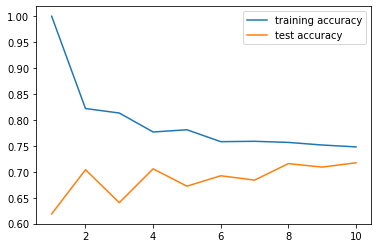

In [1435]:
# K Nearest Neighbor with different neighbor settings
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors) # build the model
    knn.fit(X_train, y_train) 

    training_accuracy.append(knn.score(X_train, y_train)) # record training set accuracy

    test_accuracy.append(knn.score(X_test, y_test)) # record generalization accuracy

# Visualize accuuracy to avoid underfitting or overfitting
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend();

In [1436]:
# The highest accuracy seems to be with 6 neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

print("Accuracy on training set: "+ format(knn.score(X_train, y_train), '0.2%'))
print("Accuracy on test set: " + format(knn.score(X_test, y_test), '0.2%'))

Accuracy on training set: 75.81%
Accuracy on test set: 69.23%


In [1437]:
# Decision Tree seems to have the highest accuracy among the three classifiers used

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train, y_train)

print("Accuracy on training set: "+ format(tree.score(X_train, y_train), '0.2%'))
print("Accuracy on test set: " + format(tree.score(X_test, y_test), '0.2%'))

Accuracy on training set: 100.00%
Accuracy on test set: 83.61%


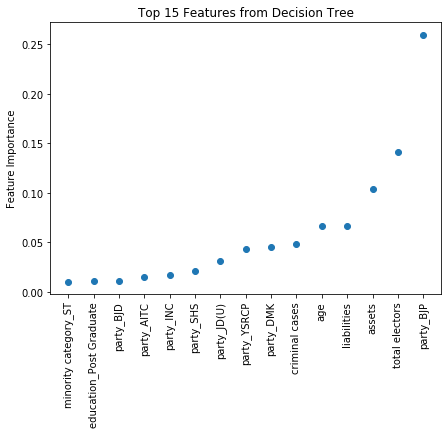

In [1438]:
# Let's look at some of the important features

# Extracting top 15 features from the decision tree
top_fifteen = tree.feature_importances_.argsort()[-15:]

# Let's visualize these features
plt.subplots(figsize = (7, 5))

plt.plot(tree.feature_importances_[top_fifteen], 'o')
plt.xticks(range(len(X_train.columns[top_fifteen])),
           X_train.columns[top_fifteen],
           rotation = 90);
plt.title("Top 15 Features from Decision Tree")
plt.ylabel("Feature Importance")
plt.show()

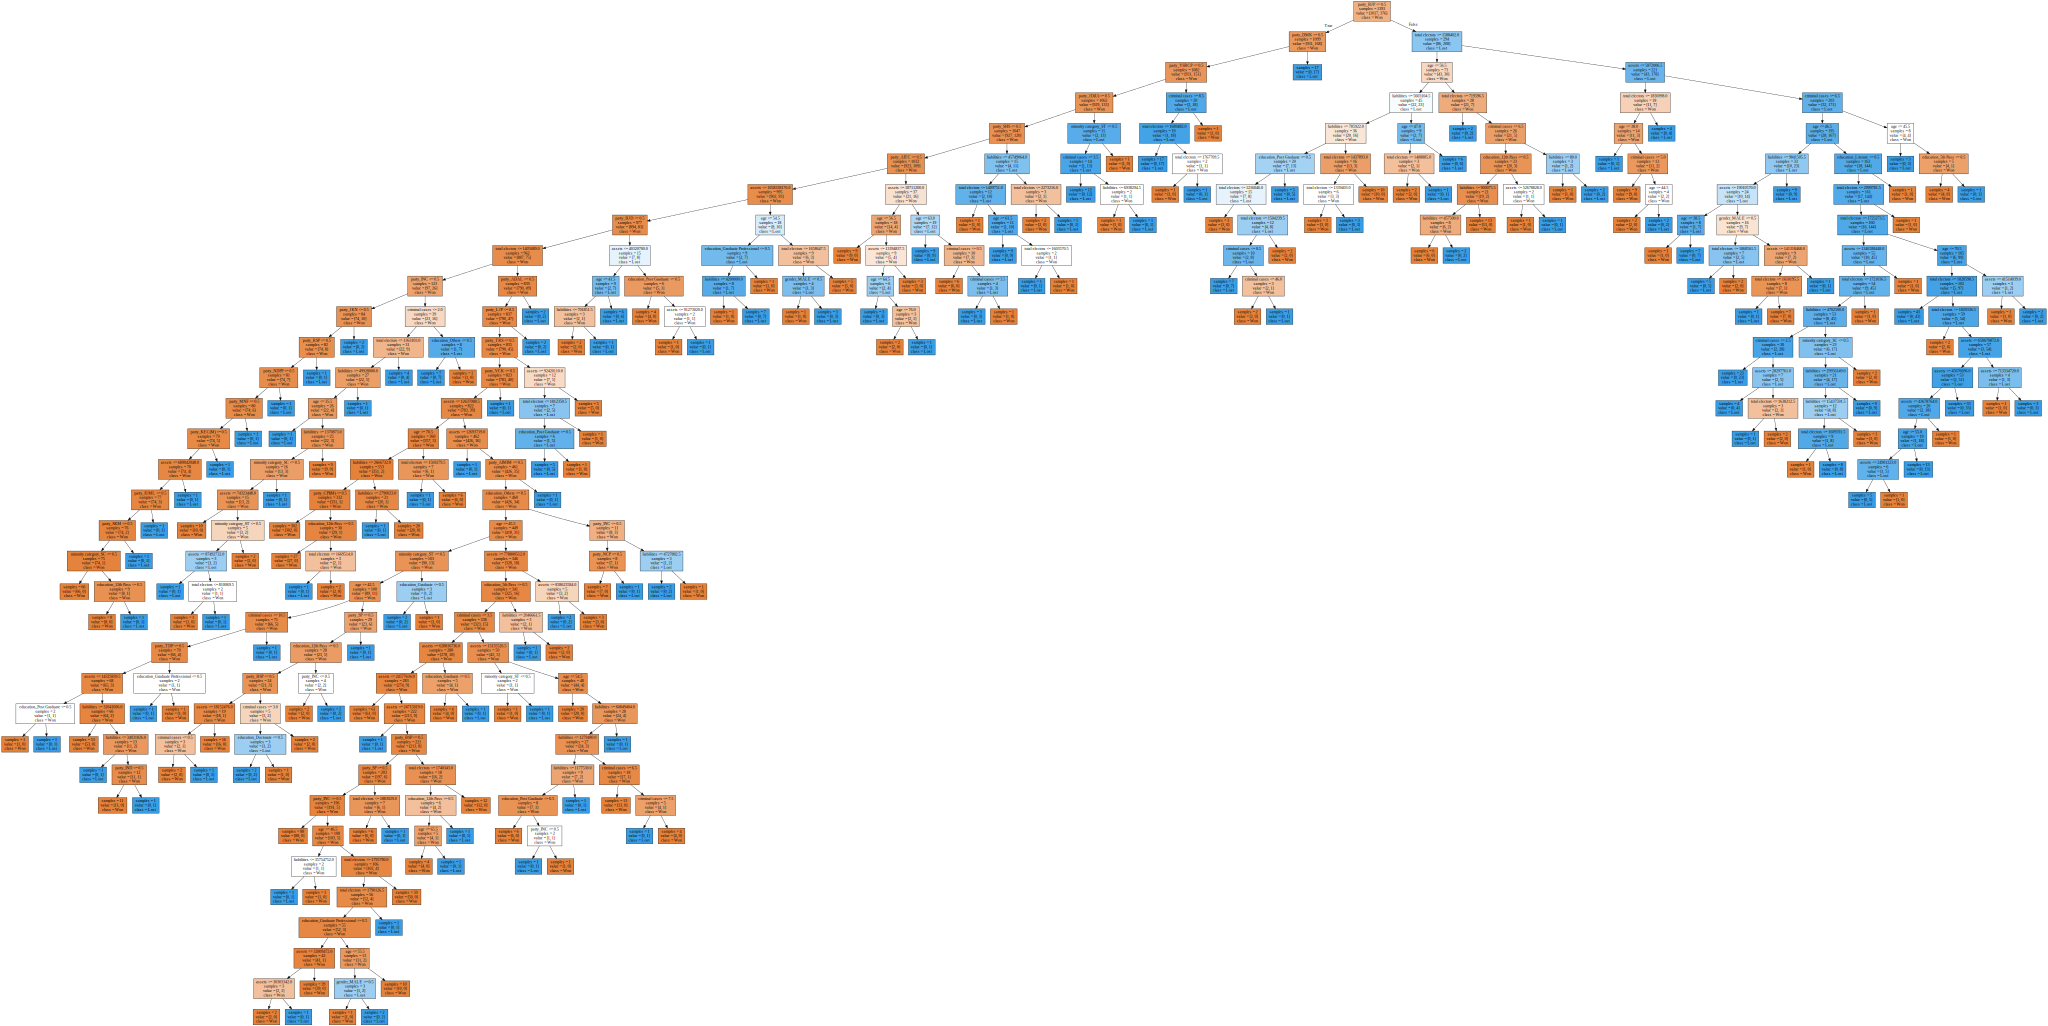

In [1439]:
# We can visualize are tree nodes using graphviz
from sklearn.tree import export_graphviz
import graphviz

# Create 'dot' file
export_graphviz(tree, out_file="mytree.dot", class_names=["Won", "Lost"],
feature_names=X_train.columns, impurity=False, filled=True)

# A file with dot extension is essentially a text file to create graphs
# we can read with file and graph it in our notebook

with open("mytree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)



                                                      ~~ The End ~~